# 5. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

- Why do visual exploration?
- Understand Data Structure & Types
- Grammar of Graphics and Basics of visualisation
- Explore single variable graphs - (Quantitative, Categorical)
- Explore dual variable graphs - (Q & Q, Q & C, C & C)
- Explore multi-dimensional variable graphs

For this we will start by loading the data and understanding the data structure of the dataframe we have.

## Lets read the data

In [1]:
# Import the library we need, which is Pandas
import pandas as pd

You will find the variable `df` used quite often to store a `dataframe`

In [2]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [3]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

### PRINCIPLE: Visual Exploration 
Lets load the libraries required for plotting in python

In [4]:
# Load the visualisation libraries - Matplotlib
import matplotlib.pyplot as plt

In [5]:
# Let us see the output plots in the notebook itself
%matplotlib inline

In [7]:
import numpy as np

In [8]:
x = np.arange(10)

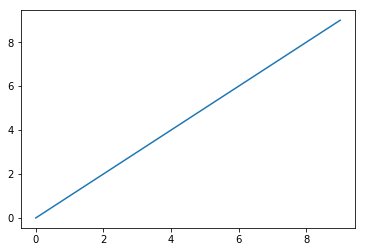

In [9]:
plt.plot(x)

In [10]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 7)

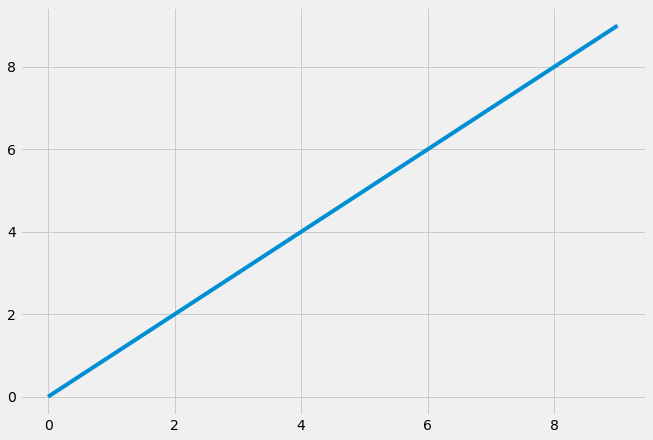

In [11]:
plt.plot(x)

### Plot the Quantity by City in 2016

In [12]:
df2016 = df[df.year == 2016]

In [13]:
df2016City = df2016.groupby(['city'], as_index=False).quantity.sum()

In [14]:
df2016City = df2016City.sort_values(by="quantity")

In [15]:
df2016City.tail(10)

,city,quantity
72,INDORE,2254330
109,MUMBAI,2872669
117,NEWASA,2897566
42,DELHI,3066639
97,LASALGAON,3402394
129,PUNE,3493535
154,SOLAPUR,3767140
126,PIMPALGAON,3836046
102,MAHUVA,6144573
15,BANGALORE,9117473


In [16]:
data=df2016.tail(20)

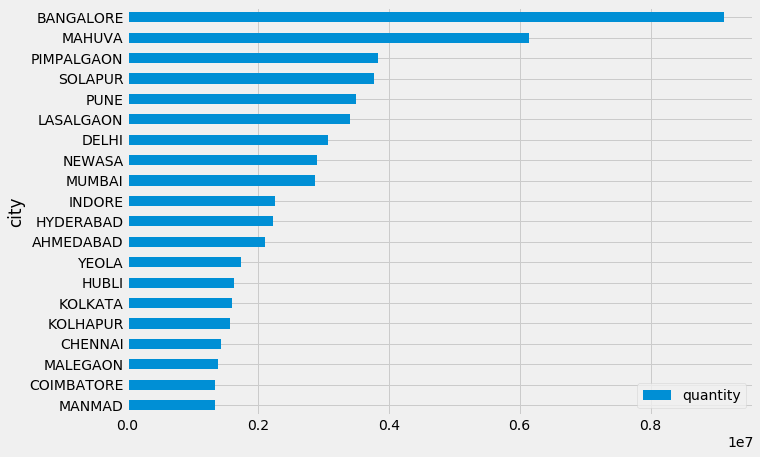

In [17]:
# Plot the Data
df2016City.tail(20).plot(kind ="barh", x = 'city', y = 'quantity')

### Exercise

Plot the quantity of Onion sold in each State for  2015

## Question 2 - Have the price variation in Onion prices in Bangalore really gone up over the years?

In [110]:
# Reduce the precision of numbers - so that it is easy to read
pd.set_option('precision', 0)

### PRINCIPLE: Setting Index

In [24]:
dfBang = df[df.city == 'BANGALORE']

In [25]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
848,BANGALORE,January,2005,335679,470,597,522,KT,BANGALORE,2005-01-01
849,BANGALORE,January,2006,412185,286,617,537,KT,BANGALORE,2006-01-01
850,BANGALORE,January,2007,268268,586,1167,942,KT,BANGALORE,2007-01-01
851,BANGALORE,January,2008,393806,174,671,472,KT,BANGALORE,2008-01-01


In [26]:
dfBang.index

Int64Index([ 847,  848,  849,  850,  851,  852,  853,  854,  855,  856,
            ...
             994,  995,  996,  997,  998,  999, 1000, 1001, 1002, 1003],
           dtype='int64', length=157)

In [27]:
# Set the index as date
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
861,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01
874,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01
887,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01
900,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01


In [28]:
# Set the Index for the Dataframe
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [29]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01


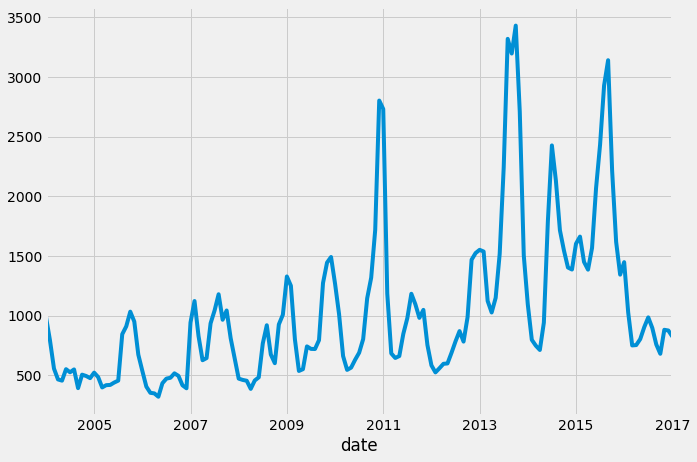

In [30]:
dfBang.priceMod.plot()

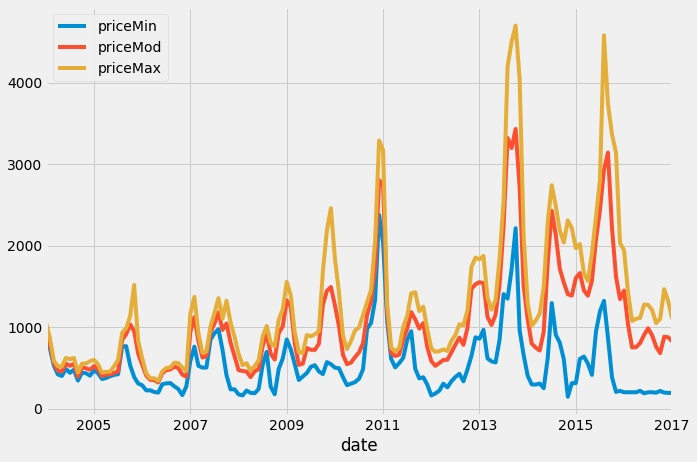

In [31]:
dfBang.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

In [32]:
dfBang['priceMinLog'] = np.log(dfBang['priceMin'])
dfBang['priceMaxLog'] = np.log(dfBang['priceMax'])
dfBang['priceModLog'] = np.log(dfBang['priceMod'])

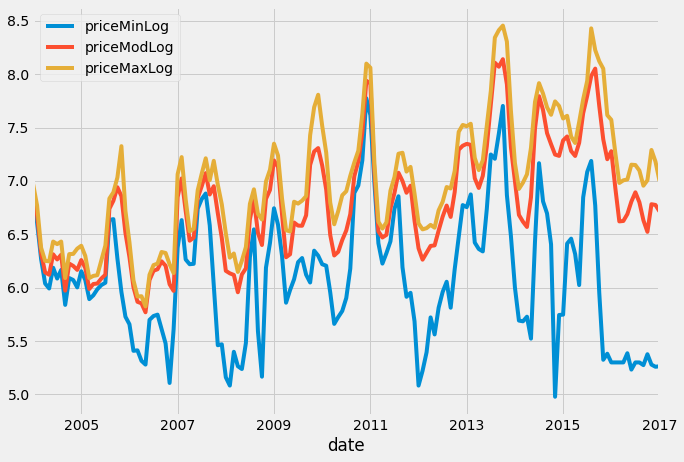

In [33]:
dfBang.plot(kind = "line", y = ['priceMinLog', 'priceModLog', 'priceMaxLog'])

To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [34]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [35]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceMinLog,priceMaxLog,priceModLog,priceDiff
date,,,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,6.820016,6.971669,6.898715,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01,6.608001,6.768493,6.675823,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01,6.267201,6.373320,6.320768,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01,6.037871,6.249975,6.142037,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01,5.991465,6.246107,6.120297,116


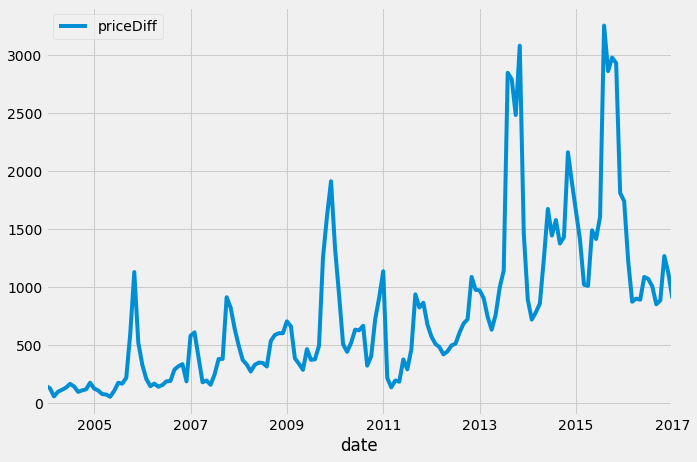

In [36]:
dfBang.plot(kind = 'line', y = 'priceDiff')

### PRINCIPLE: Pivot Table

Pivot table is a way to summarize data frame data into index (rows), columns and value 

![](../img/pivot.png)

In [37]:
# Create new variable for Integer Month
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [38]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceMinLog,priceMaxLog,priceModLog,priceDiff,monthVal
date,,,,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,6.820016,6.971669,6.898715,150,1
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01,6.608001,6.768493,6.675823,129,2
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01,6.267201,6.373320,6.320768,59,3
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01,6.037871,6.249975,6.142037,99,4
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01,5.991465,6.246107,6.120297,116,5


In [39]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceDiff", 
                             columns = "year", index = "monthVal")

In [40]:
dfBangPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
monthVal,,,,,,,,,,,,,,
1,150.0,127.0,331.0,581.0,497.0,706.0,1335.0,1138.0,575.0,973.0,892.0,1654.0,1743.0,904.0
2,129.0,110.0,209.0,611.0,373.0,663.0,934.0,218.0,511.0,907.0,721.0,1409.0,1226.0,NaN
3,59.0,79.0,147.0,398.0,334.0,387.0,509.0,137.0,484.0,745.0,784.0,1022.0,875.0,NaN
4,99.0,75.0,169.0,181.0,274.0,341.0,443.0,196.0,421.0,634.0,859.0,1012.0,902.0,NaN
5,116.0,56.0,142.0,196.0,331.0,288.0,521.0,186.0,447.0,764.0,1245.0,1491.0,893.0,NaN
6,135.0,107.0,157.0,159.0,350.0,466.0,634.0,378.0,498.0,997.0,1675.0,1416.0,1089.0,NaN
7,167.0,176.0,189.0,248.0,348.0,374.0,629.0,292.0,514.0,1143.0,1446.0,1608.0,1072.0,NaN
8,145.0,169.0,192.0,381.0,317.0,379.0,668.0,465.0,609.0,2849.0,1580.0,3256.0,1008.0,NaN
9,98.0,219.0,290.0,382.0,537.0,495.0,324.0,939.0,687.0,2793.0,1377.0,2864.0,853.0,NaN


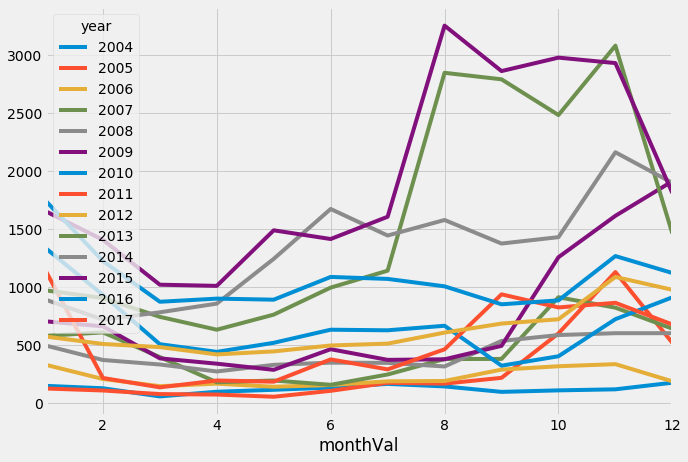

In [41]:
dfBangPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1113a8198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111905748>]], dtype=object)

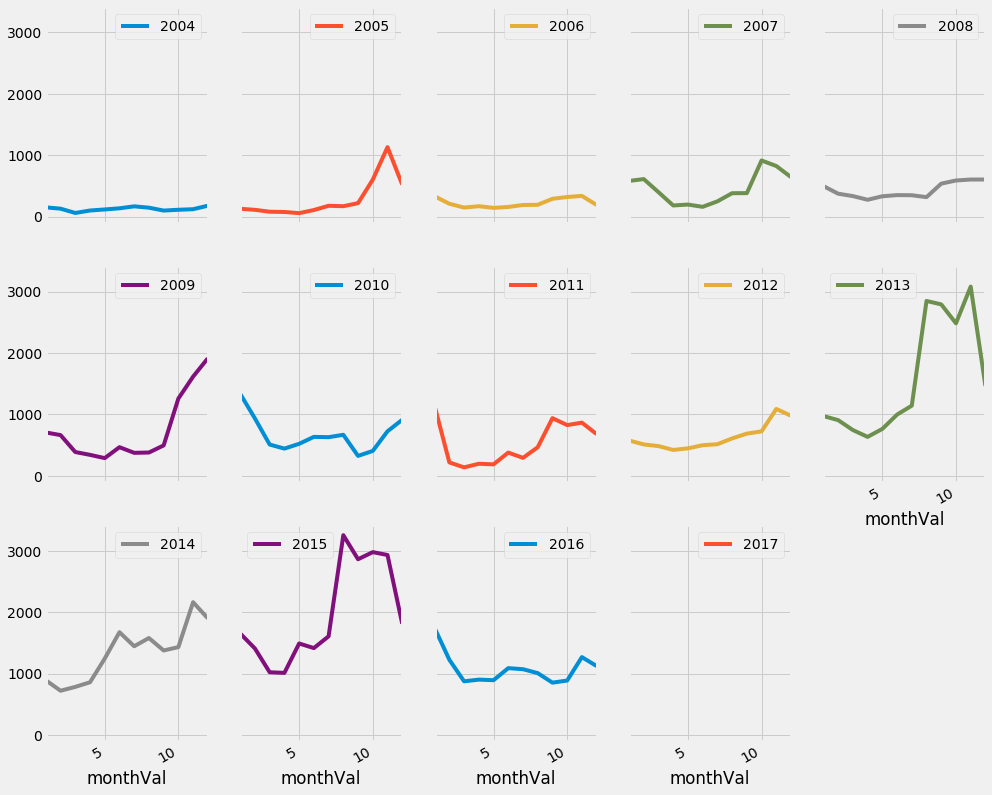

In [42]:
dfBangPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111b07ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11271e5f8>]], dtype=object)

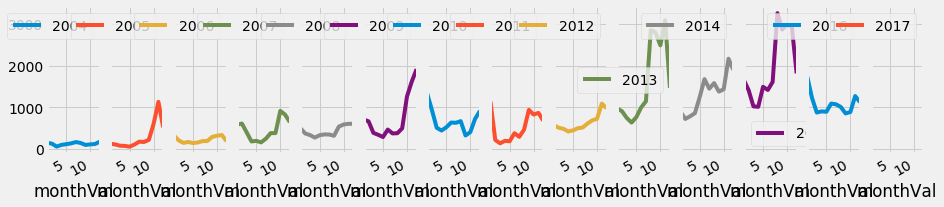

In [43]:
dfBangPivot.plot(subplots = True, figsize=(15, 3), layout=(1, 15), sharey=True)

### Exercise

Plot the price difference (priceMax - priceMin) for Delhi? 